# Step 0: Import Libraries

In [589]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
sns.set(style="white")
%matplotlib inline

# Step 1: Read the Data

In [672]:
df=pd.read_csv(r'C:\Users\asmaa\Downloads\KaggleV2-May-2016.csv')

In [673]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### <font color='red'> <i> What is the Target Variable?

classification: show / no show

# Step 2: Data Cleaning

check columns
chect dtypes
duplicates
unnecessary columns


In [674]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [675]:
df.Age = df.Age.replace(-1, 0)

In [676]:
df.describe(exclude="number")

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [677]:
df.columns = df.columns.str.replace('No-s','S').str.strip()

In [678]:
def transform(x):
    if x == 'No':
        return 1
    else:
        return 0

df['Show'] = df['Show'].apply(transform)

In [679]:
df.drop(['AppointmentID'], axis=1, inplace=True)

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  Show            110527 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 11.0+ MB


In [681]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [682]:
df.Show.value_counts()
#unbalanced

1    88208
0    22319
Name: Show, dtype: int64

In [683]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: re.sub('[a-zA-Z]', ' ', x, flags=re.UNICODE))
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: re.sub('[a-zA-Z]', ' ', x, flags=re.UNICODE))

In [684]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['SD_day_of_week'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AD_day_of_week'] = df['AppointmentDay'].dt.day_name()
#strftime("%w")
#.weekday()

In [685]:
df['Difference'] = (df['ScheduledDay'] - df['AppointmentDay']).dt.days

In [686]:
df.Difference=df.Difference.replace([1,2,3,4,5,6], np.nan)
#df.isnull().sum()
df.dropna(inplace=True)

In [687]:
df.SD_day_of_week[df['SD_day_of_week']=='Saturday'].count()

24

In [688]:
df.AD_day_of_week[df['AD_day_of_week']=='Saturday'].count()

39

In [689]:
df[df.duplicated()].count()

PatientId         618
Gender            618
ScheduledDay      618
AppointmentDay    618
Age               618
Neighbourhood     618
Scholarship       618
Hipertension      618
Diabetes          618
Alcoholism        618
Handcap           618
SMS_received      618
Show              618
SD_day_of_week    618
AD_day_of_week    618
Difference        618
dtype: int64

In [690]:
df=df.drop_duplicates()

In [691]:
df.PatientId.duplicated().sum()
#df[df.PatientId.duplicated()]

47605

In [692]:
df['Duplicate'] = df['PatientId'].duplicated(keep=False).map({True:1, False:0})

In [693]:
df1=df[(df['Duplicate']==1) & (df['Show']==0) ].sort_values(by=['PatientId'])

In [694]:
df1= df1[df1.PatientId.duplicated()]
df1.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,SD_day_of_week,AD_day_of_week,Difference,Duplicate
25202,1.224513e+08,M,2016-04-07 12:39:53,2016-05-02,28,JESUS DE NAZARETH,0,0,0,0,0,0,0,Thursday,Monday,-25.0,1
50736,5.225847e+08,F,2016-04-26 15:44:59,2016-05-16,3,SANTA CECÍLIA,0,0,0,0,0,0,0,Tuesday,Monday,-20.0,1
50732,5.225847e+08,F,2016-04-26 15:44:32,2016-05-16,3,SANTA CECÍLIA,0,0,0,0,0,0,0,Tuesday,Monday,-20.0,1
7705,2.237714e+09,M,2016-04-27 18:34:55,2016-05-03,54,ANDORINHAS,1,1,0,1,0,0,0,Wednesday,Tuesday,-6.0,1
63972,3.996325e+09,M,2016-05-11 08:51:23,2016-05-16,37,ANDORINHAS,0,0,0,0,0,0,0,Wednesday,Monday,-5.0,1


# Step 3: EDA

#### <font color='red'> <i> Use atleast one appropriate visuals in each of the below

<AxesSubplot:>

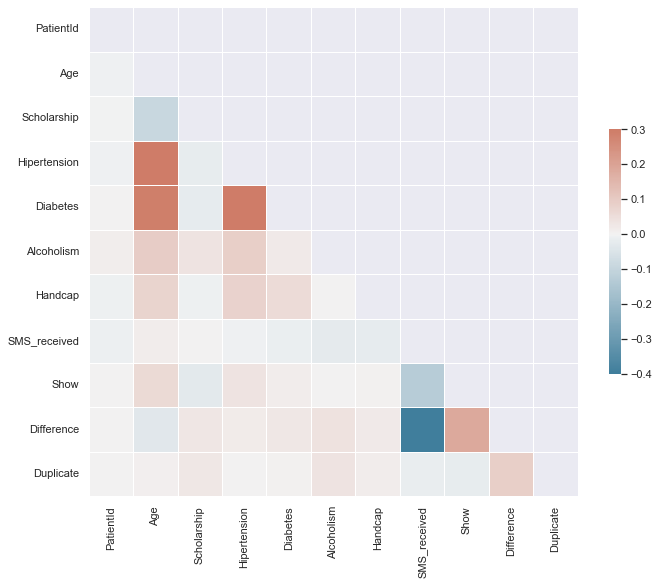

In [695]:
sns.set_style('darkgrid')
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There are positive correlations between <b>(Diabetes, Age, Hipertension)</b>

There are negative correlations between <b>(Difference, SMS_Received)</b>

<h3>3.1 Target variable</h3>

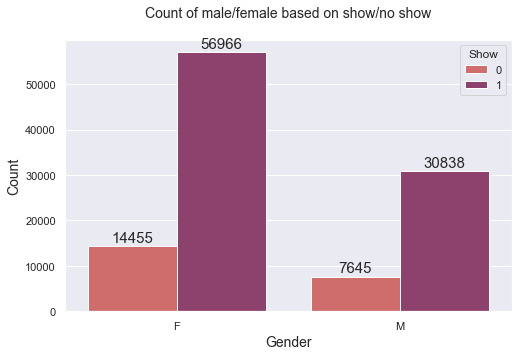

In [696]:
plt.figure(figsize=(8, 5))
plots = sns.countplot(x="Gender", hue="Show", data=df, palette='flare')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Gender", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of male/female based on show/no show\n", size=14)
plt.show()

Around <b>20.31%</b> of females have missed their appointments compared to men <b>(19.96%)</b>. Moreover, most reservations are from femals <b>(64.99%)</b> which indicates a good health care from their side.

<AxesSubplot:xlabel='Dates', ylabel='Count'>

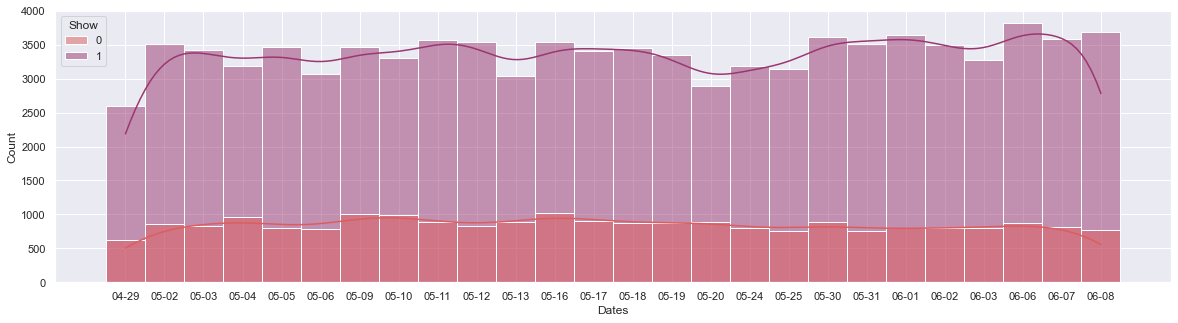

In [697]:
df['Dates'] = df['AppointmentDay'].dt.strftime("%m-%d")
df.sort_values(by=['Dates'],ascending=True, inplace=True)
df_copy = df.query("Dates != '05-14'")
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))
sns.histplot(x="Dates", data=df_copy,hue="Show", palette='flare', kde=True)

Although the number of patients have changed, The no-show patients show stable indecation

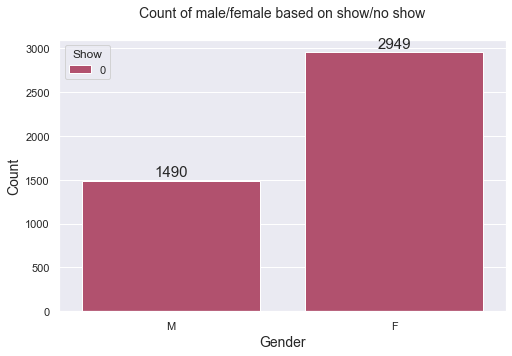

In [698]:
plt.figure(figsize=(8, 5))
plots = sns.countplot(x="Gender", hue="Show", data=df1, palette='flare')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Gender", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of male/female based on show/no show\n", size=14)
plt.show()

Around <b>4.03%</b> of these patients have missed their appointments twice or more.(<b>4.13%</b> F, <b>3.87%</b> M )

### 3.2. Numerical features


<AxesSubplot:xlabel='Age', ylabel='Count'>

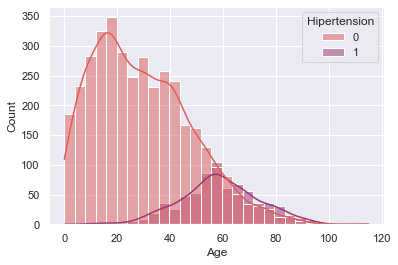

In [699]:
sns.histplot(x='Age', data=df1, hue='Hipertension', palette='flare', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

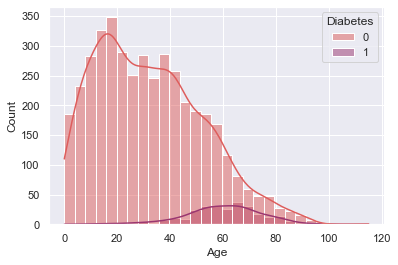

In [700]:
sns.histplot(x='Age', data=df1, hue='Diabetes', palette='flare', kde=True)

normal distribution of Hipertension and Diabetes

<AxesSubplot:xlabel='AD_week_no', ylabel='Count'>

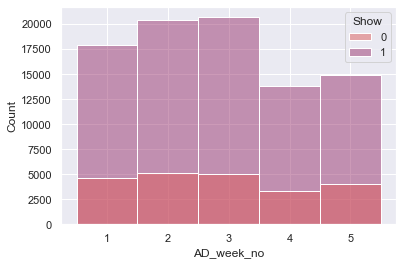

In [701]:
df['SD_week_no'] = df['ScheduledDay'].dt.strftime("%w")
df['AD_week_no'] = df['AppointmentDay'].dt.strftime("%w")
df.sort_values(by=['AD_week_no'],ascending=True, inplace=True)
df_copy = df.query("AD_week_no != '6'")
sns.histplot(x='AD_week_no', data=df_copy, hue='Show', palette='flare')
#(1:Monday,2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday, 7:Sunday) 

low no. of patients on last 2 working days

<AxesSubplot:xlabel='AD_day_of_week', ylabel='Count'>

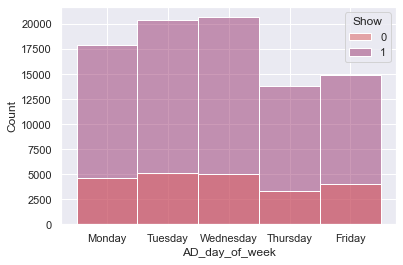

In [702]:
sns.histplot(x='AD_day_of_week', data=df_copy, hue='Show', palette='flare')

<AxesSubplot:xlabel='Age', ylabel='Count'>

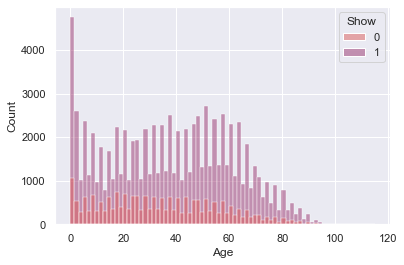

In [703]:
sns.histplot(x='Age', data=df, hue='Show', palette='flare')

<AxesSubplot:xlabel='Show', ylabel='Difference'>

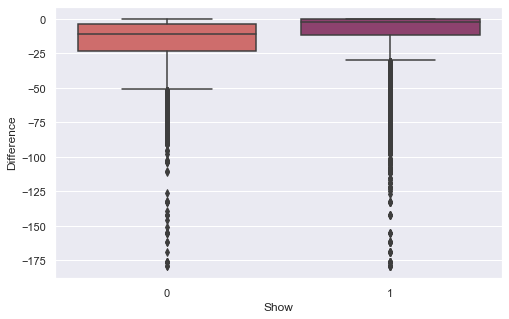

In [704]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Show", y="Difference", data=df, palette='flare')

There were wrong dates (reservetion date after appointment date<b> (difference>0)</b>), There are also reservations that exceed 5 months.

the missng occures if the difference between schedule and appointment dates increase

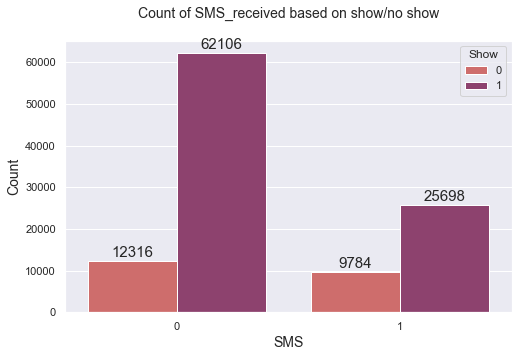

In [705]:
plt.figure(figsize=(8, 5))
plots = sns.countplot(x="SMS_received", hue="Show", data=df, palette='flare')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("SMS", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of SMS_received based on show/no show\n", size=14)
plt.show()

The majority of shown patients didn't receive SMS prior to appointment date, hence it is not a reason of no-show 

<AxesSubplot:xlabel='Age', ylabel='Count'>

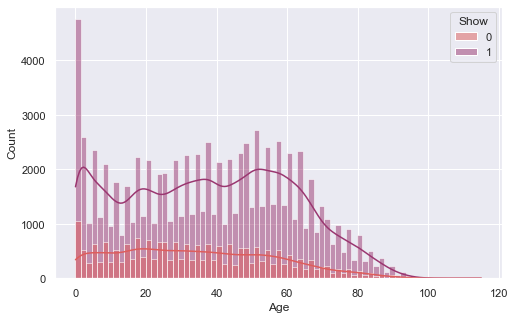

In [706]:
plt.figure(figsize=(8, 5))
sns.histplot(x='Age', data=df, hue='Show', palette='flare', kde=True)

The majority of Shown patients are babies and elderly

In [707]:
#df_copy = df1.query("Difference <-1")
#sns.histplot(x='Difference', data=df_copy, hue='SMS_received', palette='flare', kde=True)
#sns.lineplot(data=df, x="Difference", y="Show")

### 3.3 Categorical Features

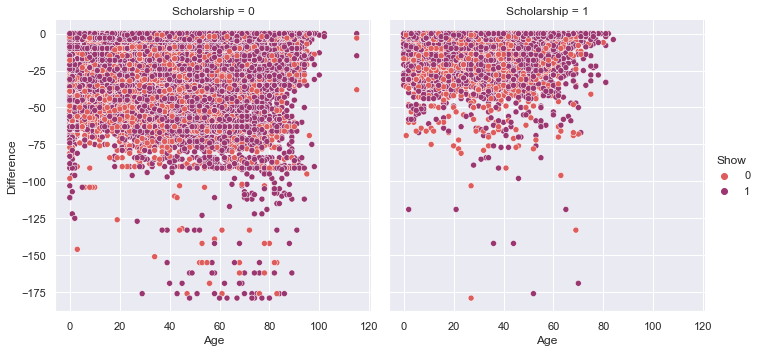

In [708]:
#df_copy1 = df.query("Gender == 1")
sns.relplot(x='Age', y ='Difference',hue='Show', col ='Scholarship',data=df, palette='flare')

In [709]:
#plt.figure(figsize=(16,16))
#sns.countplot(y='Neighbourhood',data=df, hue="Show",palette='flare',order=df['Show'])

# Step 4: Data Pre-Processing

In [710]:
df.Gender=df.Gender.replace('F', 1)
df.Gender=df.Gender.replace('M', 0)

In [711]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,SD_day_of_week,AD_day_of_week,Difference,Duplicate,Dates,SD_week_no,AD_week_no
97464,3.945416e+13,1,2016-05-16 15:36:32,2016-06-06,57,CENTRO,0,1,0,0,0,1,1,Monday,Monday,-21.0,1,06-06,1,1
89174,2.726636e+12,1,2016-06-06 09:01:46,2016-06-06,1,JOANA D´ARC,0,0,0,0,0,0,1,Monday,Monday,0.0,1,06-06,1,1
97078,8.215433e+13,1,2016-06-06 15:11:23,2016-06-06,86,SANTA LÚCIA,0,0,0,0,0,0,1,Monday,Monday,0.0,1,06-06,1,1
86289,9.842488e+14,1,2016-06-03 07:36:47,2016-06-06,66,JARDIM CAMBURI,0,0,0,0,0,1,0,Friday,Monday,-3.0,0,06-06,5,1
91152,7.141386e+13,0,2016-06-06 08:07:38,2016-06-06,29,SÃO BENEDITO,0,0,0,0,0,0,1,Monday,Monday,0.0,0,06-06,1,1


In [712]:
df = pd.get_dummies(df, columns=['Neighbourhood'])

In [713]:
df.drop(['PatientId','ScheduledDay','AppointmentDay','SD_day_of_week','AD_day_of_week','Dates'], axis=1, inplace=True)
X = df.drop(columns = 'Show')
y = df.Show

In [714]:
# Standerdize the Dataset
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['Age','Difference','SD_week_no','AD_week_no']
scaler = MinMaxScaler()
for col in numeric_features:
    scaler.fit(X[col].values.reshape(-1,1))
    X[col] = scaler.transform(X[col].values.reshape(-1,1))

In [715]:
X

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Difference,Duplicate,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
97464,1,0.495652,0,1,0,0,0,1,0.882682,1,...,0,0,0,0,0,0,0,0,0,0
89174,1,0.008696,0,0,0,0,0,0,1.000000,1,...,0,0,0,0,0,0,0,0,0,0
97078,1,0.747826,0,0,0,0,0,0,1.000000,1,...,0,0,0,0,0,0,0,0,0,0
86289,1,0.573913,0,0,0,0,0,1,0.983240,0,...,0,0,0,0,0,0,0,0,0,0
91152,0,0.252174,0,0,0,0,0,0,1.000000,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72316,1,0.513043,0,1,0,0,0,0,0.988827,0,...,0,0,0,0,0,0,0,0,0,0
72315,1,0.295652,0,0,0,0,0,1,0.938547,1,...,0,0,0,0,0,0,0,0,0,0
72304,1,0.504348,0,0,0,0,0,1,0.977654,1,...,0,0,0,0,0,0,0,0,0,0
72331,1,0.547826,0,1,1,0,0,0,0.988827,1,...,0,0,0,0,0,0,0,0,0,0


In [716]:
#Split Data into Train vs Test 
from sklearn.model_selection  import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Step 5: Baseline Model

In [636]:
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("The Model Accuracy is {:.2f}%,\
      Precision is {:.2f}%, Recall is {:.2f}%, \
      F1-Score is {:.2f}% ".format(lr_model.score(X_test, y_test)*100,
                                    precision_score(y_test,y_pred)*100 ,
                                   recall_score(y_test,y_pred)*100, 
                                  f1_score(y_test,y_pred) *100
))

The Model Accuracy is 79.43%,      Precision is 79.76%, Recall is 99.39%,       F1-Score is 88.50% 


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<AxesSubplot:>

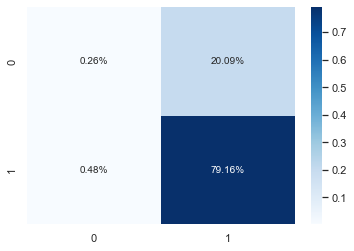

In [637]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Step 6: Bagging Algorithms

In [638]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("The Model Accuracy is {:.2f}%,\
      Precision is {:.2f}%, Recall is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(rf_model.score(X_test, y_test)*100,
                                    precision_score(y_test,y_pred)*100 ,
                                   recall_score(y_test,y_pred)*100 ,
                                   f1_score(y_test,y_pred) *100
))

The Model Accuracy is 78.38%,      Precision is 81.59%, Recall is 94.08%,        F1-Score is 87.39% 


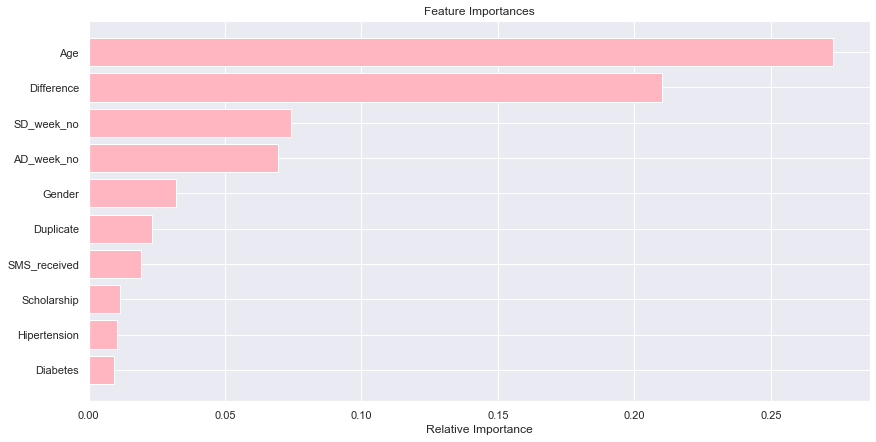

In [662]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(14,7))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='lightpink', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

# Step 6: Boosting Algorithms

C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[0]	validation_0-logloss:0.58336	validation_1-logloss:0.58463
[1]	validation_0-logloss:0.52465	validation_1-logloss:0.52687
[2]	validation_0-logloss:0.49007	validation_1-logloss:0.49337
[3]	validation_0-logloss:0.46881	validation_1-logloss:0.47284
[4]	validation_0-logloss:0.45535	validation_1-logloss:0.46019
[5]	validation_0-logloss:0.44661	validation_1-logloss:0.45217
[6]	validation_0-logloss:0.44080	validation_1-logloss:0.44700
[7]	validation_0-logloss:0.43690	validation_1-logloss:0.44373
[8]	validation_0-logloss:0.43416	validation_1-logloss:0.44147
[9]	validation_0-logloss:0.43227	validation_1-logloss:0.44013
[10]	validation_0-logloss:0.43091	validation_1-logloss:0.43935
[11]	validation_0-logloss:0.42995	validation_1-logloss:0.43886
[12]	validation_0-logloss:0.42905	validation_1-logloss:0.43848
[13]	validation_0-logloss:0.42827	validation_1-logloss:0.43819
[14]	validation_0-logloss:0.42767	validation_1-logloss:0.43785
[15]	validation_0-logloss:0.42714	validation_1-logloss:0.43775
[1

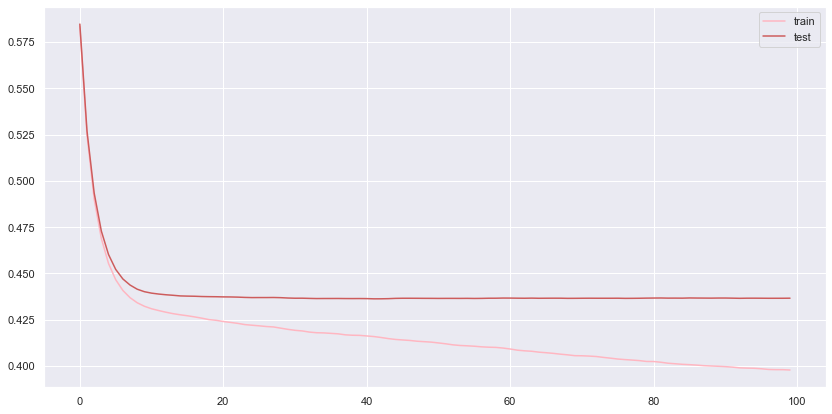

In [723]:

# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset

model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)

print("The Model Accuracy is {:.2f}%,\
      Precision is {:.2f}%, Recall is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(score*100,
                                   precision_score(y_test,yhat)*100,
                                   recall_score(y_test,yhat)*100 ,
                                   f1_score(y_test,yhat)*100 
))
# retrieve performance metrics
plt.figure(figsize=(14,7))
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train', color='lightpink')
pyplot.plot(results['validation_1']['logloss'], label='test',color='indianred')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# NN

In [642]:
!pip install keras

In [643]:
!pip install keras_metrics

In [735]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_metrics

np.random.seed(2)

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=93, activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='softmax')) 


model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model.summary()
history = model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=5, batch_size=64)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 15)                1410      
                                                                 
 dense_52 (Dense)            (None, 10)                160       
                                                                 
 dense_53 (Dense)            (None, 8)                 88        
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_54 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,667
Trainable params: 1,667
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\keras_metrics\metrics.py:26: UserWarning:

`layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



1199/1203 [============================>.] - ETA: 0s - loss: 0.4997 - accuracy: 0.8001 - precision: 0.7987 - recall: 1.0000 - f1_score: 0.8881WARNING:tensorflow:`add_update` `inputs` kwarg has been deprecated. You no longer need to pass a value to `inputs` as it is being automatically inferred.


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\keras_metrics\metrics.py:26: UserWarning:

`layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



1203/1203 [==============================] - 9s 6ms/step - loss: 0.4998 - accuracy: 0.8000 - precision: 0.7987 - recall: 1.0000 - f1_score: 0.8881 - val_loss: 0.4913 - val_accuracy: 0.7954 - val_precision: 0.7999 - val_recall: 1.0000 - val_f1_score: 0.8888
Epoch 2/5
1203/1203 [==============================] - 6s 5ms/step - loss: 0.4873 - accuracy: 0.8000 - precision: 0.7997 - recall: 1.0000 - f1_score: 0.8887 - val_loss: 0.4854 - val_accuracy: 0.7954 - val_precision: 0.7997 - val_recall: 1.0000 - val_f1_score: 0.8887
Epoch 3/5
1203/1203 [==============================] - 6s 5ms/step - loss: 0.4796 - accuracy: 0.8000 - precision: 0.7996 - recall: 1.0000 - f1_score: 0.8886 - val_loss: 0.4737 - val_accuracy: 0.7954 - val_precision: 0.7997 - val_recall: 1.0000 - val_f1_score: 0.8887
Epoch 4/5
1203/1203 [==============================] - 6s 5ms/step - loss: 0.4683 - accuracy: 0.8000 - precision: 0.7995 - recall: 1.0000 - f1_score: 0.8886 - val_loss: 0.4636 - val_accuracy: 0.7954 - val_prec

In [736]:
model.evaluate(X_test, y_test)

1031/1031 [==============================] - 4s 4ms/step - loss: 0.4622 - accuracy: 0.7965 - precision: 0.7994 - recall: 1.0000 - f1_score: 0.8885


[0.46215376257896423,
 0.796463668346405,
 0.799427330493927,
 1.0,
 0.8885366916656494]

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


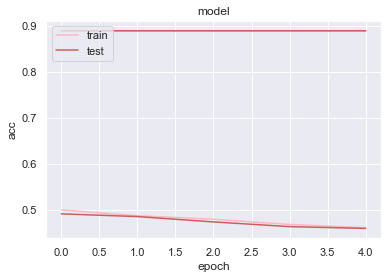

In [741]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['f1_score'],color='lightpink')
plt.plot(history.history['val_f1_score'],color='indianred')
plt.plot(history.history['loss'],color='lightpink')
plt.plot(history.history['val_loss'],color='indianred')
plt.title('model')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [732]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_metrics

np.random.seed(2)

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=93, activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='softmax')) 


model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model.summary()
history = model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=10, batch_size=64)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 15)                1410      
                                                                 
 dense_48 (Dense)            (None, 10)                160       
                                                                 
 dense_49 (Dense)            (None, 8)                 88        
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,667
Trainable params: 1,667
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\keras_metrics\metrics.py:26: UserWarning:

`layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



1192/1203 [============================>.] - ETA: 0s - loss: 0.5072 - accuracy: 0.7999 - precision: 0.8008 - recall: 1.0000 - f1_score: 0.8894WARNING:tensorflow:`add_update` `inputs` kwarg has been deprecated. You no longer need to pass a value to `inputs` as it is being automatically inferred.


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\keras_metrics\metrics.py:26: UserWarning:

`layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



1203/1203 [==============================] - 9s 6ms/step - loss: 0.5069 - accuracy: 0.8000 - precision: 0.8008 - recall: 1.0000 - f1_score: 0.8894 - val_loss: 0.4919 - val_accuracy: 0.7954 - val_precision: 0.7999 - val_recall: 1.0000 - val_f1_score: 0.8888
Epoch 2/10
1203/1203 [==============================] - 6s 5ms/step - loss: 0.4882 - accuracy: 0.8000 - precision: 0.7995 - recall: 1.0000 - f1_score: 0.8886 - val_loss: 0.4849 - val_accuracy: 0.7954 - val_precision: 0.7997 - val_recall: 1.0000 - val_f1_score: 0.8887
Epoch 3/10
1203/1203 [==============================] - 5s 4ms/step - loss: 0.4790 - accuracy: 0.8000 - precision: 0.7995 - recall: 1.0000 - f1_score: 0.8886 - val_loss: 0.4754 - val_accuracy: 0.7954 - val_precision: 0.7997 - val_recall: 1.0000 - val_f1_score: 0.8887
Epoch 4/10
1203/1203 [==============================] - 5s 4ms/step - loss: 0.4698 - accuracy: 0.8000 - precision: 0.7995 - recall: 1.0000 - f1_score: 0.8886 - val_loss: 0.4649 - val_accuracy: 0.7954 - val_p

In [733]:
model.evaluate(X_test, y_test)

1031/1031 [==============================] - 4s 3ms/step - loss: 0.4578 - accuracy: 0.7965 - precision: 0.7995 - recall: 1.0000 - f1_score: 0.8886


[0.4577862322330475,
 0.796463668346405,
 0.7994894981384277,
 1.0,
 0.8885670304298401]